### Decision Tree Task

### 약물 A, B, C, X, Y
##### 다중 분류(Multiclass Classification)
- 의학 연구원으로서 동일한 질병을 앓고 있는 일련의 환자에 대한 데이터를 수집했다.
- 치료 과정 동안 각 환자는 5가지 약물, 즉 약물 A, 약물 B, 약물 c, 약물 x 및 y 중 하나에 반응했다.
-  미래에 동일한 질병을 앓는 환자에게 어떤 약물이 적합할 수 있는지 알아보기 위한 모델을 구축한다.

##### feature
- Age: 환자의 나이
- Sex: 환자의 성별
- BP: 혈압
- Cholesterol: 콜레스테롤 수치
- Na_to_K: 나트륨-칼륨

##### target
- Drug: 의약품, 환자에게 효과가 있었던 약

In [2]:
import pandas as pd

drugs_df = pd.read_csv('./datasets/drugs.csv')
drugs_df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


#### 레이블 인코딩
- 문자열 값을 정수로 변경하는 데이터 전처리 기법

##### 타겟 데이터(의약품) 레이블 인코딩

In [3]:
from sklearn.preprocessing import LabelEncoder
drugs_encoder = LabelEncoder()

targets = drugs_encoder.fit_transform(drugs_df['Drug'])
drugs_df['Drug'] = targets

In [4]:
display(drugs_df)
drugs_encoder.classes_[drugs_df.loc[0, 'Drug']]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,4
1,47,M,LOW,HIGH,13.093,2
2,47,M,LOW,HIGH,10.114,2
3,28,F,NORMAL,HIGH,7.798,3
4,61,F,LOW,HIGH,18.043,4
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,2
196,16,M,LOW,HIGH,12.006,2
197,52,M,NORMAL,HIGH,9.894,3
198,23,M,NORMAL,NORMAL,14.020,3


'drugY'

##### 환자의 성별 레이블 인코딩

In [5]:
from sklearn.preprocessing import LabelEncoder
gender_encoder = LabelEncoder()

targets = gender_encoder.fit_transform(drugs_df['Sex'])
drugs_df['Sex'] = targets

In [6]:
display(drugs_df)
gender_encoder.classes_[drugs_df.loc[0, 'Sex']]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,HIGH,HIGH,25.355,4
1,47,1,LOW,HIGH,13.093,2
2,47,1,LOW,HIGH,10.114,2
3,28,0,NORMAL,HIGH,7.798,3
4,61,0,LOW,HIGH,18.043,4
...,...,...,...,...,...,...
195,56,0,LOW,HIGH,11.567,2
196,16,1,LOW,HIGH,12.006,2
197,52,1,NORMAL,HIGH,9.894,3
198,23,1,NORMAL,NORMAL,14.020,3


'F'

##### 혈압 수치 레이블 인코딩

In [7]:
from sklearn.preprocessing import LabelEncoder
blood_pressure_encoder = LabelEncoder()

targets = blood_pressure_encoder.fit_transform(drugs_df['BP'])
drugs_df['BP'] = targets

In [8]:
display(drugs_df)
blood_pressure_encoder.classes_[drugs_df.loc[0, 'BP']]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,HIGH,25.355,4
1,47,1,1,HIGH,13.093,2
2,47,1,1,HIGH,10.114,2
3,28,0,2,HIGH,7.798,3
4,61,0,1,HIGH,18.043,4
...,...,...,...,...,...,...
195,56,0,1,HIGH,11.567,2
196,16,1,1,HIGH,12.006,2
197,52,1,2,HIGH,9.894,3
198,23,1,2,NORMAL,14.020,3


'HIGH'

##### 콜레스테롤 수치 레이블 인코딩

In [9]:
from sklearn.preprocessing import LabelEncoder
cholesterol_encoder = LabelEncoder()

targets = cholesterol_encoder.fit_transform(drugs_df['Cholesterol'])
drugs_df['Cholesterol'] = targets

In [10]:
display(drugs_df)
cholesterol_encoder.classes_[drugs_df.loc[0, 'Cholesterol']]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


'HIGH'

In [11]:
drugs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int32  
 2   BP           200 non-null    int32  
 3   Cholesterol  200 non-null    int32  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int32  
dtypes: float64(1), int32(4), int64(1)
memory usage: 6.4 KB


In [13]:
drugs_df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [12]:
drugs_df.duplicated().sum()

0

##### 훈련 데이터 세트와 테스트 데이터 세트 분리, 결정 트리 알고리즘으로 훈련

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

decision_tree_classifier = DecisionTreeClassifier()

features, targets = drugs_df.iloc[:, :-1], drugs_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2)

decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
from sklearn.tree import export_graphviz

export_graphviz(decision_tree_classifier, out_file='./images/drugs_dtc01.dot', class_names=drugs_encoder.classes_, feature_names=features.columns, impurity=True, filled=True)

In [16]:
import graphviz

with open("./images/drugs_dtc01.dot") as f:
    dot_graph = f.read()

drugs_dtc_graph = graphviz.Source(dot_graph)

In [17]:
drugs_dtc_graph.render(filename='drugs_dtc01', directory='./images', format='png')

'images\\drugs_dtc01.png'

<img src="./images/drugs_dtc01.png" width=800 style="margin-left:0">

##### feature별 중요도 확인하기

Age, 0.1281
Sex, 0.0
BP, 0.2573
Cholesterol, 0.1248
Na_to_K, 0.4899


<Axes: >

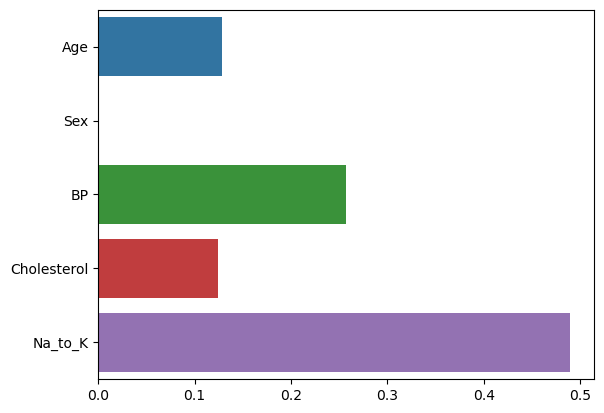

In [22]:
import seaborn as sns
import numpy as np

for name, value in zip(features.columns, decision_tree_classifier.feature_importances_):
    print(f'{name}, {round(value, 4)}')
    
sns.barplot(x=decision_tree_classifier.feature_importances_, y=features.columns)

##### 과적합 확인하기

In [23]:
print(features.columns)

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], dtype='object')


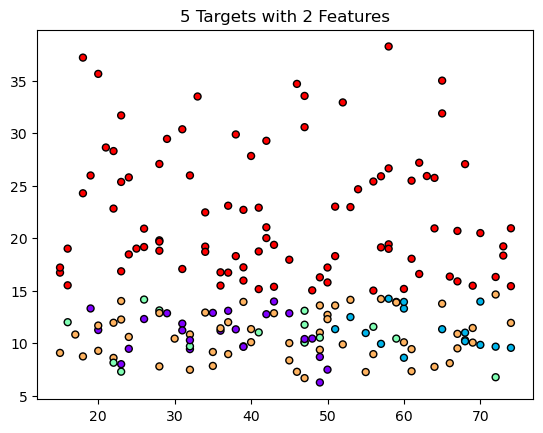

In [26]:
import matplotlib.pyplot as plt

plt.title('5 Targets with 2 Features')
plt.scatter(features.iloc[:, 0], features.iloc[:, -1], marker='o', c=targets, s=25, cmap="rainbow", edgecolors='k')

In [27]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


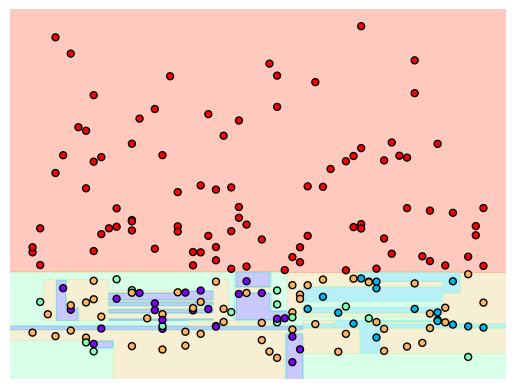

In [28]:
from sklearn.tree import DecisionTreeClassifier

# 2개의 feature만 사용하기 때문에 중요도가 높은 순으로 2개를 분리한다.
features = features.iloc[:, [0, -1]]

decision_tree_classifier = DecisionTreeClassifier().fit(features, targets)

visualize_boundary(decision_tree_classifier, features, targets)

##### 최소 samples의 개수를 제한하여 과적합 해결

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


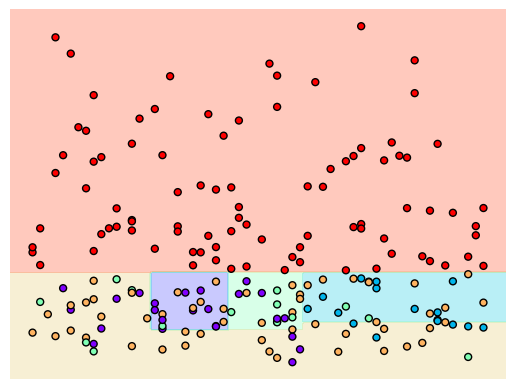

In [29]:
from sklearn.tree import DecisionTreeClassifier

# 2개의 feature만 사용하기 때문에 중요도가 높은 순으로 2개를 분리한다.
features = features.iloc[:, [0, -1]]

decision_tree_classifier = DecisionTreeClassifier(min_samples_leaf=16).fit(features, targets)

visualize_boundary(decision_tree_classifier, features, targets)